### Portfolio Analysis based on your Risk Aversion level and timeframe
We have 3 levels of Risk Aversion, with level 3 being the most aggressive
We have 3 timeframes for which we will do our Monte Carlo forecasts: 5, 10, and 20 years.

In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
#chaim edit 11/3/21 
from utils.writeToCSV import writeToCSV #importing to write results to CSV file
from utils.get_dates import get_start_date
from utils.get_dates import get_end_date

#from pathlib import Path
#import csv
%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

In [3]:
#User inputs 
while True:
    try:
        portfolio_value = input("To begin, please enter the amount to be invested (USD). If you would like to quit, please enter 'Quit': \n")
    
        if portfolio_value == 'Quit':
            print('You have quit the program. Have a nice day.')
            
            break
        
        portfolio_value = float(portfolio_value)
        
        if portfolio_value < 1000000:
            print("Unfortunately, you do not have enough savings to invest in a portfolio. \nThe minimum required is $1,000,000.")
    
        break
    except ValueError:
        print("Please only enter numerical digits.")

    



To begin, please enter the amount to be invested (USD). If you would like to quit, please enter 'Quit': 
 10000000


In [4]:
#Get user input for risk tolerance. User must input 1, 2, or 3. If risk_tolerance is not one of these, we prompt user
#to try again.
risk_tolerance = input("Please select your risk tolerance level from 1-3, 3 being the most aggressive: ")
#print(risk_tolerance)
#type if statment here
if int(risk_tolerance) == 1:
    tickers = ["JPM","VTEB","PZA","BNDX","GOOGL"]
    print("Thank you for your response!  You are a conversative investor.")
    print(f"The stocks in your portfolio will be {tickers}")
    #JP Morgan, Vanguard Tax-Exempt Bond Index Fund ETF, Invesco National AMT-Free Municipal Bond ETF, Vanguard Total International Bond Index Fund
    #Google
elif int(risk_tolerance) == 2:
    tickers = ["FB","AAPL","TSLA","RDS.A","GS"]
    print("Thank you for your response!  You are an aggressive investor.")
    print(f"The stocks in your portfolio will be {tickers}")
    #Facebook, Apple, Tesla, Shell Oil, Goldman Sachs
elif int(risk_tolerance) == 3:
    tickers = ["NFLX","ADBE","AMZN","PYPL","GME"]
    print("Thank you for your response!  You are a very aggressive investor.")
    print(f"The stocks in your portfolio will be {tickers}")
    #Netflix, Adobe, Amazon, Paypal, GameStop

else:
    print("I'm sorry, you need to enter 1, 2, or 3 for the application to work.")
#chaim edit- changed the print function to simplify output
risk_tolerance = int(risk_tolerance) #force it to be a number since the result of input() is a string



    

Please select your risk tolerance level from 1-3, 3 being the most aggressive:  2


Thank you for your response!  You are an aggressive investor.
The stocks in your portfolio will be ['FB', 'AAPL', 'TSLA', 'RDS.A', 'GS']


In [5]:
# Set the variables for the Alpaca API and secret keys. Will be making calls for historical prices.
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Check the values were imported correctly by evaluating the type of each
display(type(alpaca_api_key))
display(type(alpaca_secret_key))

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version="v2")


str

str

In [6]:
# Set the tickers for both the bond and stock portion of the portfolio

#This setting of tickers will also need to be made a bit more dynamic again dep on what client selects
#We know this would be risk tolerance level 2 based on Nev's list.
#tickers = ["FB","AAPL","TSLA","RDS.A","GS"] Paul Lopez moved this up on 2021-10-29 to the top depending on if client enters 1, 2, or 3 for risk tolerance

# Set timeframe to 1D 
timeframe = "1D"

# Format current date as ISO format
# Set both the start and end date at the date of your prior business day 
# This will give you the closing price of the previous trading day
#Made it dynamic so start and end date are always T-1 business days 20211104
start_date = get_start_date() #pd.Timestamp("2021-10-27", tz="America/New_York").isoformat()
end_date = get_start_date() #pd.Timestamp("2021-10-27", tz="America/New_York").isoformat()
limit_rows = 1000
start_date

'2021-11-03T00:00:00-04:00'

In [7]:
# We use the Alpaca get_barset function to get current closing prices for our portfolio of 5 tickers
prices_df = alpaca.get_barset(tickers, timeframe, start=start_date, end=end_date, limit=limit_rows).df

# checking dataframe to make sure everything looks ok for our closes
prices_df.head()


AAPL                                        FB  \
                             open    high     low   close    volume    open   
time                                                                          
2021-11-03 00:00:00-04:00  150.37  151.97  149.82  151.49  44064848  327.49   

                                                             ...  RDS.A  \
                             high    low    close    volume  ...   open   
time                                                         ...          
2021-11-03 00:00:00-04:00  332.15  323.2  331.695  18822024  ...  44.53   

                                                            TSLA           \
                            high    low  close   volume     open     high   
time                                                                        
2021-11-03 00:00:00-04:00  44.97  44.45  44.77  4790366  1177.43  1215.39   

                                                        
                               low     close    volume  
time                                                    
2021-11-03 00:00:00-04:00  1152.62  1213.688  32191945  

[1 rows x 25 columns]

In [8]:
# Access the closing prices for our 5 tickers from the Alpaca DataFrame
# We also convert the value to a floating point number
#Again will need to be made dynamic depending on if level 1 2 or 3 risk tolerance level is selected
stock1_close_price = float(prices_df[tickers[0]]["close"])
stock2_close_price = float(prices_df[tickers[1]]["close"])
stock3_close_price = float(prices_df[tickers[2]]["close"])
stock4_close_price = float(prices_df[tickers[3]]["close"])
stock5_close_price = float(prices_df[tickers[4]]["close"])

display(stock1_close_price)
display(stock2_close_price)
display(stock3_close_price)
display(stock4_close_price)
display(stock5_close_price)

331.695

151.49

1213.688

44.77

417.81

In [9]:
# Calculate the current value of the bond portion of the portfolio
#Again will need to be made dynamic depending on if level 1 2 or 3 risk tolerance level is selected
value_per_share = portfolio_value/5 

#Paul Lopez added sample code for Bipasha to use when her dynamic weights- 20211103
#value_share1 = portfolio_value * weight1 'weight1 will be the weight as determined by Bipasha's algorithm
#value_share2 = portfolio_value * weight2
#value_share3 = portfolio_value * weight3
#value_share4 = portfolio_value * weight4
#value_share5 = portfolio_value * weight5


stock1_shares = value_per_share / stock1_close_price
stock2_shares = value_per_share / stock2_close_price
stock3_shares = value_per_share / stock3_close_price
stock4_shares = value_per_share / stock4_close_price
stock5_shares = value_per_share / stock5_close_price

# Print how many shares we get of each stock assuming 200k is available for each one.
print(f"With ${value_per_share:.2f} you will be able to purchase {stock1_shares:.0f} shares of {tickers[0]}.")
print(f"With ${value_per_share:.2f} you will be able to purchase {stock2_shares:.0f} shares of {tickers[1]}.")
print(f"With ${value_per_share:.2f} you will be able to purchase {stock3_shares:.0f} shares of {tickers[2]}.")
print(f"With ${value_per_share:.2f} you will be able to purchase {stock4_shares:.0f} shares of {tickers[3]}.")
print(f"With ${value_per_share:.2f} you will be able to purchase {stock5_shares:.0f} shares of {tickers[4]}.")


With $2000000.00 you will be able to purchase 6030 shares of FB.
With $2000000.00 you will be able to purchase 13202 shares of AAPL.
With $2000000.00 you will be able to purchase 1648 shares of TSLA.
With $2000000.00 you will be able to purchase 44673 shares of RDS.A.
With $2000000.00 you will be able to purchase 4787 shares of GS.


In [10]:
# Set start and end dates of 10 years back from your current date
#We'll always assume 10 years back. Again we can make this dynamic if we want
#and start with yesterday's date and then go back 10 years.
#Added dynamic start and end date 20211104 Paul Lopez
start_date = get_end_date() #pd.Timestamp("2011-10-28", tz="America/New_York").isoformat()
end_date = get_start_date() #pd.Timestamp("2021-10-28", tz="America/New_York").isoformat()

display(start_date)
display(end_date)
limit_rows = 1000

'2011-09-08T00:00:00-04:00'

'2021-11-03T00:00:00-04:00'

In [11]:
# Use the Alpaca get_barset function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
prices_df = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=limit_rows
).df

# Display both the first and last five rows of the DataFrame
display(prices_df.head(2))
display(prices_df.tail(2))
tickers

AAPL                         FB                 \
                          open high low close volume open high low close   
time                                                                       
2017-10-20 00:00:00-04:00  NaN  NaN NaN   NaN    NaN  NaN  NaN NaN   NaN   
2017-10-23 00:00:00-04:00  NaN  NaN NaN   NaN    NaN  NaN  NaN NaN   NaN   

                                  ...  RDS.A                                   \
                          volume  ...   open   high     low  close     volume   
time                              ...                                           
2017-10-20 00:00:00-04:00    NaN  ...  60.98  61.15  60.920  61.07  2174961.0   
2017-10-23 00:00:00-04:00    NaN  ...  61.12  61.43  61.005  61.02  2975089.0   

                          TSLA                        
                          open high low close volume  
time                                                  
2017-10-20 00:00:00-04:00  NaN  NaN NaN   NaN    NaN  
2017-10-23 00:00:00-04:00  NaN  NaN NaN   NaN    NaN  

[2 rows x 25 columns]

AAPL                                          FB  \
                             open    high     low   close      volume    open   
time                                                                            
2021-11-02 00:00:00-04:00  148.67  151.57  148.65  150.00  61741508.0  331.36   
2021-11-03 00:00:00-04:00  150.37  151.97  149.82  151.49  44064848.0  327.49   

                                                                 ...  RDS.A  \
                               high    low    close      volume  ...   open   
time                                                             ...          
2021-11-02 00:00:00-04:00  334.7895  323.8  328.200  26662242.0  ...  45.35   
2021-11-03 00:00:00-04:00  332.1500  323.2  331.695  18822024.0  ...  44.53   

                                                                TSLA           \
                            high     low  close     volume      open     high   
time                                                                            
2021-11-02 00:00:00-04:00  45.55  45.095  45.40  4448625.0  1159.355  1208.59   
2021-11-03 00:00:00-04:00  44.97  44.450  44.77  4790366.0  1177.430  1215.39   

                                                          
                               low     close      volume  
time                                                      
2021-11-02 00:00:00-04:00  1146.00  1171.850  38817598.0  
2021-11-03 00:00:00-04:00  1152.62  1213.688  32191945.0  

[2 rows x 25 columns]

['FB', 'AAPL', 'TSLA', 'RDS.A', 'GS']

###Here we run a Monte Carlo simulation of 1000 samples and the time frame could be 5, 10, or 20 years depending on the user's response. We always will assume equal 20% weight for each stock in the portfolio.

In [12]:
# Configure the Monte Carlo simulation to forecast cumulative returns based on the client's input.

#Changed 2021-11-02. We will run 3 scenarios of 5yr, 10yr, and 20yr.
# The weights we will assume will be split evenly 20 percent for each ticker.
# We will be running 1000 samples.
MC_even_weight_5yr = MCSimulation(
    portfolio_data = prices_df,
    weights = [0.2,0.2,0.2,0.2,0.2],
    num_simulation = 500,
    #num_trading_days = 252*time_horizon  #This variable is 5, 10, or 20 depending on client's input above
    num_trading_days = 252*5 #added 2021-11-02 by Paul Lopez. We'll be running 5yr, 10yr, and 20yr MC. So hardcoded the * 5 now
)

# Review the simulation input data
MC_even_weight_5yr.portfolio_data.head()


AAPL                                      FB       \
                          open high low close volume daily_return open high   
time                                                                          
2017-10-20 00:00:00-04:00  NaN  NaN NaN   NaN    NaN          NaN  NaN  NaN   
2017-10-23 00:00:00-04:00  NaN  NaN NaN   NaN    NaN          NaN  NaN  NaN   
2017-10-24 00:00:00-04:00  NaN  NaN NaN   NaN    NaN          NaN  NaN  NaN   
2017-10-25 00:00:00-04:00  NaN  NaN NaN   NaN    NaN          NaN  NaN  NaN   
2017-10-26 00:00:00-04:00  NaN  NaN NaN   NaN    NaN          NaN  NaN  NaN   

                                     ...   RDS.A                     \
                          low close  ...     low   close     volume   
time                                 ...                              
2017-10-20 00:00:00-04:00 NaN   NaN  ...  60.920  61.070  2174961.0   
2017-10-23 00:00:00-04:00 NaN   NaN  ...  61.005  61.020  2975089.0   
2017-10-24 00:00:00-04:00 NaN   NaN  ...  61.295  61.370  4415476.0   
2017-10-25 00:00:00-04:00 NaN   NaN  ...  60.880  61.055  5330133.0   
2017-10-26 00:00:00-04:00 NaN   NaN  ...  60.710  60.900  2256320.0   

                                       TSLA                                     
                          daily_return open high low close volume daily_return  
time                                                                            
2017-10-20 00:00:00-04:00          NaN  NaN  NaN NaN   NaN    NaN          NaN  
2017-10-23 00:00:00-04:00    -0.000819  NaN  NaN NaN   NaN    NaN          NaN  
2017-10-24 00:00:00-04:00     0.005736  NaN  NaN NaN   NaN    NaN          NaN  
2017-10-25 00:00:00-04:00    -0.005133  NaN  NaN NaN   NaN    NaN          NaN  
2017-10-26 00:00:00-04:00    -0.002539  NaN  NaN NaN   NaN    NaN          NaN  

[5 rows x 30 columns]

In [13]:
MC_even_weight_10yr = MCSimulation(
    portfolio_data = prices_df,
    weights = [0.2,0.2,0.2,0.2,0.2],
    num_simulation = 500,
    #num_trading_days = 252*time_horizon  #This variable is 5, 10, or 20 depending on client's input above
    num_trading_days = 252*10 #added 2021-11-02 by Paul Lopez. We'll be running 5yr, 10yr, and 20yr MC. So hardcoded the * 10 now
)

MC_even_weight_10yr.portfolio_data.head()

AAPL                                      FB       \
                          open high low close volume daily_return open high   
time                                                                          
2017-10-20 00:00:00-04:00  NaN  NaN NaN   NaN    NaN          NaN  NaN  NaN   
2017-10-23 00:00:00-04:00  NaN  NaN NaN   NaN    NaN          NaN  NaN  NaN   
2017-10-24 00:00:00-04:00  NaN  NaN NaN   NaN    NaN          NaN  NaN  NaN   
2017-10-25 00:00:00-04:00  NaN  NaN NaN   NaN    NaN          NaN  NaN  NaN   
2017-10-26 00:00:00-04:00  NaN  NaN NaN   NaN    NaN          NaN  NaN  NaN   

                                     ...   RDS.A                     \
                          low close  ...     low   close     volume   
time                                 ...                              
2017-10-20 00:00:00-04:00 NaN   NaN  ...  60.920  61.070  2174961.0   
2017-10-23 00:00:00-04:00 NaN   NaN  ...  61.005  61.020  2975089.0   
2017-10-24 00:00:00-04:00 NaN   NaN  ...  61.295  61.370  4415476.0   
2017-10-25 00:00:00-04:00 NaN   NaN  ...  60.880  61.055  5330133.0   
2017-10-26 00:00:00-04:00 NaN   NaN  ...  60.710  60.900  2256320.0   

                                       TSLA                                     
                          daily_return open high low close volume daily_return  
time                                                                            
2017-10-20 00:00:00-04:00          NaN  NaN  NaN NaN   NaN    NaN          NaN  
2017-10-23 00:00:00-04:00    -0.000819  NaN  NaN NaN   NaN    NaN          NaN  
2017-10-24 00:00:00-04:00     0.005736  NaN  NaN NaN   NaN    NaN          NaN  
2017-10-25 00:00:00-04:00    -0.005133  NaN  NaN NaN   NaN    NaN          NaN  
2017-10-26 00:00:00-04:00    -0.002539  NaN  NaN NaN   NaN    NaN          NaN  

[5 rows x 30 columns]

In [14]:
MC_even_weight_20yr = MCSimulation(
    portfolio_data = prices_df,
    weights = [0.2,0.2,0.2,0.2,0.2],
    num_simulation = 500,
    #num_trading_days = 252*time_horizon  #This variable is 5, 10, or 20 depending on client's input above
    num_trading_days = 252*20 #added 2021-11-02 by Paul Lopez. We'll be running 5yr, 10yr, and 20yr MC. So hardcoded the * 20 now
)
MC_even_weight_20yr.portfolio_data.head()

AAPL                                      FB       \
                          open high low close volume daily_return open high   
time                                                                          
2017-10-20 00:00:00-04:00  NaN  NaN NaN   NaN    NaN          NaN  NaN  NaN   
2017-10-23 00:00:00-04:00  NaN  NaN NaN   NaN    NaN          NaN  NaN  NaN   
2017-10-24 00:00:00-04:00  NaN  NaN NaN   NaN    NaN          NaN  NaN  NaN   
2017-10-25 00:00:00-04:00  NaN  NaN NaN   NaN    NaN          NaN  NaN  NaN   
2017-10-26 00:00:00-04:00  NaN  NaN NaN   NaN    NaN          NaN  NaN  NaN   

                                     ...   RDS.A                     \
                          low close  ...     low   close     volume   
time                                 ...                              
2017-10-20 00:00:00-04:00 NaN   NaN  ...  60.920  61.070  2174961.0   
2017-10-23 00:00:00-04:00 NaN   NaN  ...  61.005  61.020  2975089.0   
2017-10-24 00:00:00-04:00 NaN   NaN  ...  61.295  61.370  4415476.0   
2017-10-25 00:00:00-04:00 NaN   NaN  ...  60.880  61.055  5330133.0   
2017-10-26 00:00:00-04:00 NaN   NaN  ...  60.710  60.900  2256320.0   

                                       TSLA                                     
                          daily_return open high low close volume daily_return  
time                                                                            
2017-10-20 00:00:00-04:00          NaN  NaN  NaN NaN   NaN    NaN          NaN  
2017-10-23 00:00:00-04:00    -0.000819  NaN  NaN NaN   NaN    NaN          NaN  
2017-10-24 00:00:00-04:00     0.005736  NaN  NaN NaN   NaN    NaN          NaN  
2017-10-25 00:00:00-04:00    -0.005133  NaN  NaN NaN   NaN    NaN          NaN  
2017-10-26 00:00:00-04:00    -0.002539  NaN  NaN NaN   NaN    NaN          NaN  

[5 rows x 30 columns]

In [15]:
# Run the Monte Carlo simulation to forecast client specified number of years of cumulative returns
#Changed on 2021-11-02 by Paul Lopez. Will now be running 5yr, 10yr, and 20yr MC scenarios.
MC_even_weight_5yr.calc_cumulative_return()

#Tweaked monte carlo py file to spit out a message every 200 simulations.

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 400.


,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993347,1.027405,0.997070,0.981082,1.016725,1.010150,0.992963,0.990265,1.000215,1.021412,...,1.001410,1.005264,1.012788,0.974420,1.007523,1.024414,1.027261,1.001460,0.975285,1.015559
2,0.983213,1.045306,0.999651,0.986260,1.036074,0.983918,0.997861,1.010311,1.014371,1.016136,...,1.006133,0.987311,1.025816,0.984115,1.003131,1.019688,1.007154,1.011638,0.955844,1.029056
3,0.990189,1.069478,1.015633,0.993654,1.028252,0.988458,1.019215,1.025642,0.992066,0.995054,...,0.992327,1.002856,1.049723,0.979951,0.997007,1.016752,0.999316,1.024221,0.969955,1.043049
4,0.961202,1.055068,1.019689,0.996702,1.022491,0.985074,1.039299,1.039791,1.008359,1.015348,...,0.988527,1.006065,1.056802,1.004655,0.995012,1.042275,1.020539,1.012653,0.970112,1.041053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.138411,1.160911,5.193624,2.019182,2.229524,2.823496,2.835954,1.767886,3.574361,1.799942,...,4.694138,3.559396,6.302379,2.220551,1.353137,2.153268,8.750775,1.221957,2.759946,2.692305
1257,2.128315,1.143986,5.157924,1.976962,2.183157,2.799548,2.898694,1.766014,3.556560,1.807148,...,4.687148,3.527815,6.316813,2.210904,1.361676,2.143924,8.824479,1.244338,2.739811,2.708355
1258,2.102735,1.164249,5.138828,1.981928,2.177484,2.846526,2.872727,1.747275,3.533313,1.830395,...,4.718980,3.558255,6.345421,2.240105,1.388182,2.134873,9.075176,1.249340,2.751596,2.753299
1259,2.104619,1.180712,5.089134,1.963535,2.221624,2.859423,2.916512,1.731841,3.486770,1.896407,...,4.788944,3.568392,6.412151,2.194757,1.386225,2.101755,9.266037,1.228393,2.738341,2.755983


In [16]:
MC_even_weight_10yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 400.


,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.018082,1.004854,0.979605,1.012342,1.012009,1.014164,1.003008,1.018265,1.001055,0.991322,...,1.014267,0.989666,0.987998,0.998893,0.991026,1.000149,0.997999,0.989678,1.005033,0.995531
2,1.028439,0.999702,0.981682,1.033804,0.998728,1.001699,0.982749,1.021094,0.997344,0.983234,...,1.004493,0.987236,0.976105,1.007230,0.996356,0.991842,0.998673,1.006588,1.015612,1.013748
3,1.016244,0.996380,0.991064,1.036929,1.006774,0.995756,0.986854,1.037900,1.011625,0.977810,...,0.990104,1.001390,1.007610,0.998613,0.990850,0.994438,0.981334,1.018953,1.034830,0.992737
4,1.002827,1.019987,0.983073,1.045032,0.993653,1.024580,0.991674,1.029348,1.015835,0.999045,...,0.996521,1.019491,1.042955,0.989292,0.996083,0.999540,1.010108,1.036086,1.062432,0.996817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,14.411600,11.479125,19.536101,2.932354,4.156236,6.740628,15.068011,10.666601,11.371889,9.179386,...,10.525061,35.628002,21.859699,22.671768,12.585063,55.561488,14.837548,7.152383,23.796148,5.738510
2517,14.379520,11.557343,19.277072,2.906253,4.208960,6.707792,15.087600,10.609855,11.417237,9.208107,...,10.649954,35.754549,21.704054,22.320507,12.485022,55.656864,14.583334,7.179017,24.131478,5.790019
2518,14.210901,11.692990,19.115138,2.941934,4.210143,6.786386,15.118537,10.452021,11.727814,9.093877,...,10.858167,36.015948,21.747823,22.504014,12.326986,55.126899,14.847034,7.175835,24.256263,5.814818
2519,13.850480,11.722783,19.545701,2.953853,4.238406,6.609435,15.358695,10.267850,11.760414,9.221405,...,11.262402,35.618361,21.661599,22.628667,12.409352,56.681872,14.933295,7.237732,24.622070,5.830767


In [17]:
MC_even_weight_20yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 400.


,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998782,1.010007,0.999964,0.978288,1.002542,0.997644,0.998434,1.002025,0.997997,0.983032,...,0.995041,0.983949,1.009260,0.990816,0.982537,0.993325,1.007371,0.996655,1.000856,0.990909
2,1.011874,1.012626,1.009261,0.967514,0.986798,0.990754,1.000587,1.008858,0.999659,0.979166,...,1.018138,0.995822,1.009995,0.978897,0.987947,0.975952,1.001067,0.995920,1.005885,0.991736
3,1.008262,1.010504,1.008689,0.974806,0.995946,0.989947,1.004532,1.015779,1.016610,0.995324,...,1.015793,1.004394,0.996465,0.966923,1.012787,0.985260,1.003388,0.990217,1.021418,0.978386
4,1.009409,0.983392,1.007292,0.981038,0.993257,0.955867,1.015016,1.035716,1.020049,0.987503,...,1.000331,1.006332,1.008490,0.945891,1.012617,0.997642,0.998399,0.999878,1.014190,1.017842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5036,112.032151,327.944651,94.787748,84.843840,40.951165,46.844529,47.694925,38.527133,115.730974,70.304269,...,155.091601,673.819233,313.838565,304.193493,57.444827,22.740469,5.728384,135.230775,522.467082,201.253427
5037,111.661948,326.702616,94.834691,84.509851,40.842609,47.225533,47.235431,39.065571,114.806611,69.226041,...,155.453739,668.313377,313.093193,307.817695,59.079298,22.819903,5.724948,135.916420,513.204994,195.567440
5038,117.044168,332.753662,96.315354,84.400653,41.271440,48.110429,46.839382,39.042903,114.847047,68.884265,...,158.919424,668.204824,314.393591,306.858680,58.274316,22.750902,5.708736,135.853944,511.730989,192.185222
5039,118.883963,321.256398,96.689147,84.536179,40.404224,48.391787,45.851846,39.693384,113.119026,67.891494,...,160.044043,664.997532,313.164966,297.740178,59.402493,23.026899,5.725965,138.588517,516.422327,192.110841


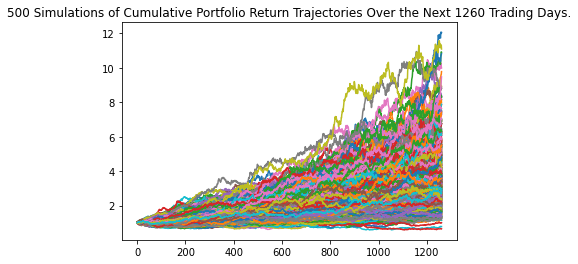

In [18]:
# Visualize the Monte Carlo simulation by creating an overlay line plot for the 5yr scenario
MC_even_weight_line_5yr_plot = MC_even_weight_5yr.plot_simulation()


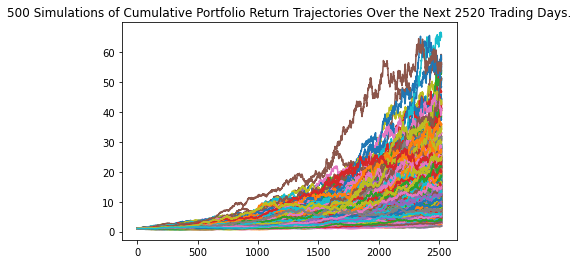

In [19]:
# Visualize the Monte Carlo simulation by creating an overlay line plot for the 10yr scenario

MC_even_weight_line_10yr_plot = MC_even_weight_10yr.plot_simulation()

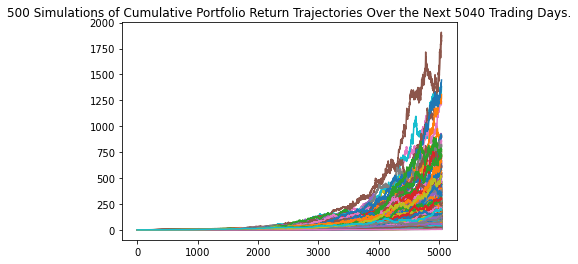

In [20]:
# Visualize the Monte Carlo simulation by creating an overlay line plot for the 20yr scenario

MC_even_weight_line_20yr_plot = MC_even_weight_20yr.plot_simulation()

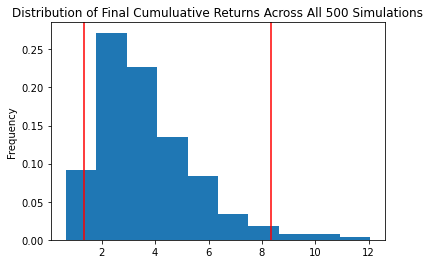

In [21]:
# Here we visualize the probability distribution of the Monte Carlo simulation 
# based on the user's timeframe by plotting a histogram
#Changed on 2021-11-02 by Paul Lopez. We are now plotting for all 3 time horizons of 5yr, 10yr, and 20yr.
MC_even_weight_5yr_distibution_plot = MC_even_weight_5yr.plot_distribution()


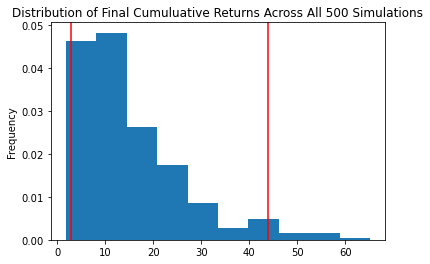

In [22]:
MC_even_weight_10yr_distibution_plot = MC_even_weight_10yr.plot_distribution()


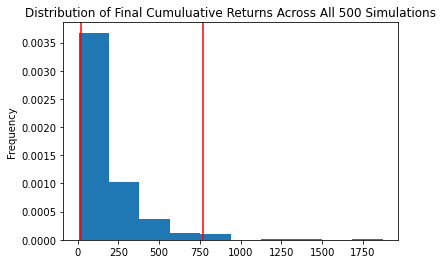

In [23]:
MC_even_weight_20yr_distibution_plot = MC_even_weight_20yr.plot_distribution()


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [24]:
# Generate summary statistics from the Monte Carlo simulation 5yr results
# We save the results as a variable
MC_even_weight_5yr_summary_table = MC_even_weight_5yr.summarize_cumulative_return()


# Review the Client's Monte Carlo summary statistics
print(MC_even_weight_5yr_summary_table)

count           500.000000
mean              3.686491
std               1.824115
min               0.649623
25%               2.383878
50%               3.287564
75%               4.690417
max              12.053751
95% CI Lower      1.338188
95% CI Upper      8.319998
Name: 1260, dtype: float64


In [25]:
# Generate summary statistics from the Monte Carlo simulation 10yr results
# We save the results as a variable
MC_even_weight_10yr_summary_table = MC_even_weight_10yr.summarize_cumulative_return()


# Review the Client's Monte Carlo summary statistics
print(MC_even_weight_10yr_summary_table)

count           500.000000
mean             15.224044
std              10.953588
min               1.791633
25%               7.547434
50%              12.023659
75%              19.922494
max              65.163967
95% CI Lower      2.876004
95% CI Upper     43.856083
Name: 2520, dtype: float64


In [26]:
# Generate summary statistics from the Monte Carlo simulation 20yr results
# We save the results as a variable
MC_even_weight_20yr_summary_table = MC_even_weight_20yr.summarize_cumulative_return()


# Review the Client's Monte Carlo summary statistics
print(MC_even_weight_20yr_summary_table)

count            500.000000
mean             191.475830
std              223.563940
min                5.697241
25%               63.139628
50%              120.062376
75%              239.624698
max             1872.077906
95% CI Lower      18.371476
95% CI Upper     771.815795
Name: 5040, dtype: float64


In [27]:
# We now use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes 
#for the current client portfolio
ci_lower_thirty_cumulative_return_5yr = round(MC_even_weight_5yr_summary_table[8]*portfolio_value,2)
ci_upper_thirty_cumulative_return_5yr = round(MC_even_weight_5yr_summary_table[9]*portfolio_value,2)

# Print the result of your calculations
print(f"There is a 95% chance that the current value of ${portfolio_value:.2f} in the portfolio with an "
      f"even 20% weight in each stock over the next 5 years will end within the range of"
      f" ${ci_lower_thirty_cumulative_return_5yr} and ${ci_upper_thirty_cumulative_return_5yr}.")


There is a 95% chance that the current value of $10000000.00 in the portfolio with an even 20% weight in each stock over the next 5 years will end within the range of $13381875.91 and $83199981.41.


In [28]:
# We now use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes 
#for the current client portfolio
ci_lower_thirty_cumulative_return_10yr = round(MC_even_weight_10yr_summary_table[8]*portfolio_value,2)
ci_upper_thirty_cumulative_return_10yr = round(MC_even_weight_10yr_summary_table[9]*portfolio_value,2)

# Print the result of your calculations
print(f"There is a 95% chance that the current value of ${portfolio_value:.2f} in the portfolio with an "
      f"even 20% weight in each stock over the next 10 years will end within the range of"
      f" ${ci_lower_thirty_cumulative_return_10yr} and ${ci_upper_thirty_cumulative_return_10yr}.")


There is a 95% chance that the current value of $10000000.00 in the portfolio with an even 20% weight in each stock over the next 10 years will end within the range of $28760036.3 and $438560829.23.


In [29]:
# We now use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes 
#for the current client portfolio
ci_lower_thirty_cumulative_return_20yr = round(MC_even_weight_20yr_summary_table[8]*portfolio_value,2)
ci_upper_thirty_cumulative_return_20yr = round(MC_even_weight_20yr_summary_table[9]*portfolio_value,2)

# Print the result of your calculations
print(f"There is a 95% chance that the current value of ${portfolio_value:.2f} in the portfolio with an "
      f"even 20% weight in each stock over the next 20 years will end within the range of"
      f" ${ci_lower_thirty_cumulative_return_20yr} and ${ci_upper_thirty_cumulative_return_20yr}.")


There is a 95% chance that the current value of $10000000.00 in the portfolio with an even 20% weight in each stock over the next 20 years will end within the range of $183714761.28 and $7718157952.24.


In [30]:
#created dictionary to store values for csv file
client_info_dict = {
    "Value of Portfolio" : [f"${portfolio_value:.2f}","-","-","-","-"],
    "Value Per Share" : [f"${value_per_share:.2f}", f"${value_per_share:.2f}", f"${value_per_share:.2f}",
                         f"${value_per_share:.2f}", f"${value_per_share:.2f}"],
    "Portfolio Tickers" : [tickers[0], tickers[1], tickers[2], tickers[3], tickers[4]],
    "Shares per Ticker" : [f"{stock1_shares:.0f}", f"{stock2_shares:.0f}",f"{stock3_shares:.0f}", f"{stock4_shares:.0f}", f"{stock5_shares:.0f}"]    
}  
print(client_info_dict)

{'Value of Portfolio': ['$10000000.00', '-', '-', '-', '-'], 'Value Per Share': ['$2000000.00', '$2000000.00', '$2000000.00', '$2000000.00', '$2000000.00'], 'Portfolio Tickers': ['FB', 'AAPL', 'TSLA', 'RDS.A', 'GS'], 'Shares per Ticker': ['6030', '13202', '1648', '44673', '4787']}


In [31]:
#created dataframe from dictionary
client_info_df = pd.DataFrame(client_info_dict)
client_info_df.set_index("Value of Portfolio")

,Value Per Share,Portfolio Tickers,Shares per Ticker
Value of Portfolio,,,
$10000000.00,$2000000.00,FB,6030
-,$2000000.00,AAPL,13202
-,$2000000.00,TSLA,1648
-,$2000000.00,RDS.A,44673
-,$2000000.00,GS,4787


In [32]:
#created csv with dataframe
#client_info_df.to_csv("Client Info.csv", index=False) #moved to util folder function 20211103 Paul Lopez

In [33]:
#created dictionary to turn into a csv file
report_details_dict = {
    "Holding Period" : ["5year", "10year", "20year"],
    "Lower Bound Values" : [f"${ci_lower_thirty_cumulative_return_5yr}",f"${ci_lower_thirty_cumulative_return_10yr}",
                   f"${ci_lower_thirty_cumulative_return_20yr}"],
    "Upper Bound Values" : [f"${ci_upper_thirty_cumulative_return_5yr}",f"${ci_upper_thirty_cumulative_return_10yr}",
                   F"${ci_upper_thirty_cumulative_return_20yr}"]}
                 

In [34]:
#created dataframe with dictionary
report_details_df = pd.DataFrame(report_details_dict)
report_details_df.set_index("Holding Period")

,Lower Bound Values,Upper Bound Values
Holding Period,,
5year,$13381875.91,$83199981.41
10year,$28760036.3,$438560829.23
20year,$183714761.28,$7718157952.24


In [35]:
# created csv file with dataframe
#report_details_df.to_csv("Report Details.csv", index=False) #moved to util folder function 20211103 Paul Lopez

In [36]:
writeToCSV("Client_Info.csv", "Report_Details.csv",client_info_df, report_details_df)
#writeToCSV("FinalReport.csv",combinedDataFrame) #for Chaim

Reports have been saved. Have a nice day!
